# KIN 482D: Computational modeling of human sensorimotor control and learning

## Appendix C: Model Fitting and Model Comparison

## Goals of this section

- Learn how to fit a model to data (i.e., "fit the parameters of a model to data")
- Effectively, this means adjusting the model's unknown parameters (such as $\sigma_\text{sensed}$ from Kording & Wolpert 2004) so that the data are accounted for as well as possible
- We'll learn the most popular method of parameter fitting, called "maximum likelihood estimation (MLE)"
    - Mathematically the same as when we discussed MLE in the context of different estimates, or estimators
    - Conceptually, we're now talking about using MLE to figure out which parameter values make the observed data (i.e., responses) most probable
    - MLE is used for many types of models, not just Bayesian
    - Also, we could fit Bayesian models with Bayesian estimation/statistics, but that is outside the scope of this class
    - We'll learn that the MLE is the same as the MAP when assuming flat priors


## What is a model?

- We can define a model of behavior as a response distribution:

$$p(\text{subject response}|\text{stimuli})$$

Of course, there are all of the other underlying parts that get us to the response distribution as well...

## Free parameters

- **parameters:** variables of unknown value that are assumed to be constant throughout an experiment
    - Represent properties or beliefs that may differ between subjects
    - Examples: sensory noise level ($\sigma$), assumed prior mean ($\mu_{\text{prior}}$)
    - Set of free parameters of a model is collectively represented by $\theta$ (sometimes also see capital theta, $\Theta$)
    - Model itself is represented by $M$
    - We make the dependence of the response distribution on the parameters and the model explicit by writing $p(\text{subject response} | \text{stimuli}; \theta, M)$
    - Here, semicolon serves to separate variables that vary from trial to trial (response and stimuli) from the model identity and model parameters, which do *not* vary from trial to trial

## The parameter likelihood

- The goal in **model fitting/parameter fitting/parameter estimation** is to try to find the parameter values that best describe the data
- **Maximum likelihood estimation** is the approach you will learn for parameter estimation  
&nbsp;  


$$\mathscr{L}_M(\theta;\text{data}) = p(\text{subject responses across all trials} \mid \text{stimuli across all trials}; \theta, M)$$

&nbsp;

***The likelihood of a parameter combination, $\theta$, is high when (the model with) that parameter combination (applied to the stimuli experienced by the subject) would often produce the subject responses.*** 



## Conditional independence of observations

$$\mathscr{L}_M(\theta;\text{data}) = \prod_{i=1}^{n_{\text{trials}}} p(\text{subject responses across all trials} \mid \text{stimuli across all trials}; \theta, M)$$

- We assume each observation is independent of all others and that all observations come from same distribution
- Sometimes this property is referred to as I.I.D. - independent and identically distributed


## Maximum-likelihood estimation (MLE)

- MLE of the parameters $\theta$ means finding the values of $\theta$ such that $\mathscr{L}_M(\theta ; \text{data})$ is highest. In other words, what parameter values maximize the probability of your data. 

- Typically, when we write code to perform MLE, we maximize the $\text{log} \left( \mathscr{L}_M(\theta ; \text{data}) \right)$

- This is because when you multiply lots of small values (like probabilities), you can run into the problem of "underflow", which is when values become smaller than what a programming language/computer is capable of representing. 

- Taking the log has several advantages: 
    - Maximizing $\mathscr{L}_M(\theta ; \text{data})$ is equivalent to maximizing $\text{log} \left[ \mathscr{L}_M(\theta ; \text{data}) \right]$
    - Multiplication becomes addition: $\text{log}(a \cdot b) = \text{log}(a) + \text{log}(b)$
    - $\text{log}(p)$ values scale to be between $(-\infty, 0]$, so you avoid underflow

<center><img src="images/figC-1.png" width=800></center>

*\*"brain" in the figure refers to the subject's brain*

## Maximum-likelihood estimation (MLE)

- Why do we not use Bayesian statistics to estimate the parameters?
    - MLE is equivalent to Bayesian parameter estimation using uniform priors over parameter values
    - Authors state that use of priors (to be fully Bayesian in our parameter estimation) is not necessary as long as the data set is sufficiently large (many trials) and there are sufficiently few parameters -- why? 
    - Beyond scope of this class
    

## Fitting data from an estimation task

First, fit with a simple model in which the observer does not use a prior and simply reports the measurement. That is, $\hat{s} = x$ and distribution of $p(\hat{s}|s, \sigma) \sim N(s, \sigma^2)$.

**Go to the board.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = "retina"

In [2]:
# Data for estimation task: 's' is true stim location; 's_hat' is observer's estimates
s = np.array([1.61, 5.50, -6.78, 2.59, 0.96, -3.92, -1.30, 1.03, 10.74, 8.31, 
              -4.05, 9.10, 2.18, -0.19, 2.14]) 
s_hat = np.array([0.37, 1.62, -1.17, 1.66, 1.17, -0.79, -1.14, 0.76, 4.31, 
                  2.86, -0.61, 3.25, 0.48, 0.12, 0.18])

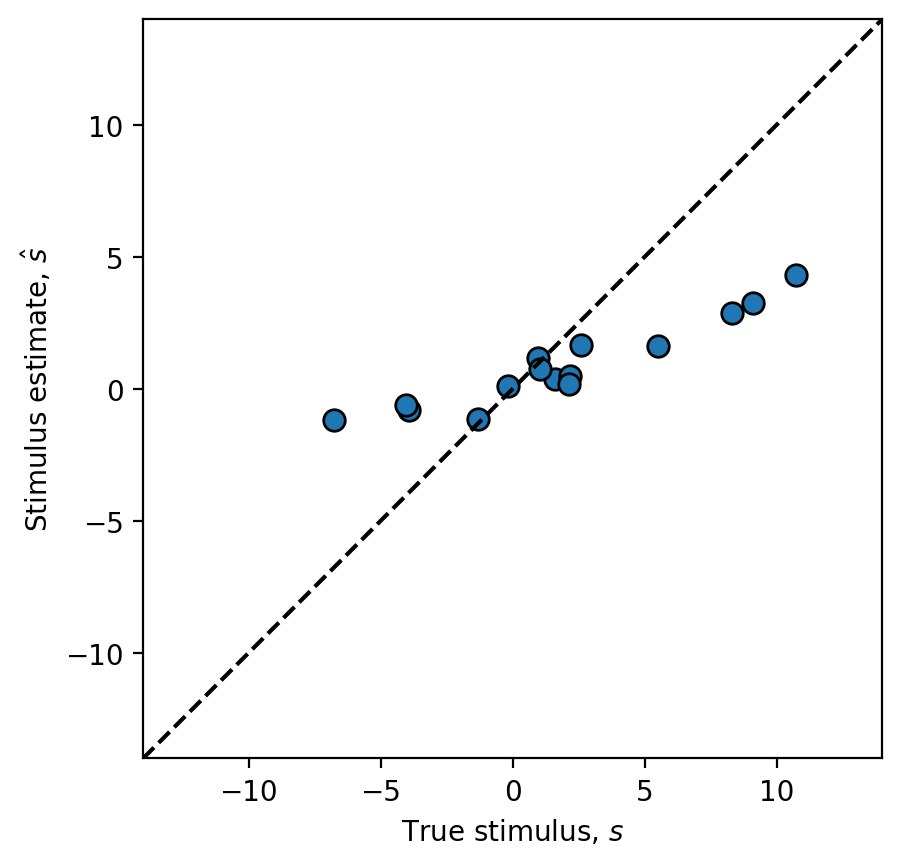

In [3]:
# Plot the data
lb, ub = [-14, 14]  # axes boundaries

# Set-up your figure axis object
fig, ax = plt.subplots()
ax.plot(
    np.arange(lb, ub + 0.1, 0.5), 
    np.arange(lb, ub + 0.1, 0.5),
    color='k',
    linestyle="--")
ax.scatter(s, s_hat, edgecolor='k', s=60)
ax.set(xlim=[lb, ub], ylim=[lb, ub], xlabel="True stimulus, $s$", \
       ylabel="Stimulus estimate, $\hat{s}$")
ax.set_box_aspect(1)  # Make axes square
plt.show()

### Finding best-fit parameter using grid search

See Notability notes for derivation of log-likelihood calculation.

In [4]:
# Define parameter values, initialize LL
sigmas = np.arange(0.5, 10.01, 0.01)
log_likelihood = np.zeros(len(sigmas)) 

# Loop through possible sigmas - using Eqn. C.6 for calculating LL (Note: 
# Eqn. C.6 is just another way to express the equation for a Gaussian, which 
# works just as well)
for k in range(len(sigmas)):
    log_likelihood[k] = np.sum(
        (-1 / 2) * np.log(2 * np.pi * sigmas[k]**2) 
        - ((s_hat - s)**2) / (2 * sigmas[k]**2)
        )


In [5]:
# Find MLE of sigma
sigma_mle = sigmas[np.argmax(log_likelihood)]
print(f"The MLE of sigma is {round(sigma_mle, 2)}.")

The MLE of sigma is 3.49.


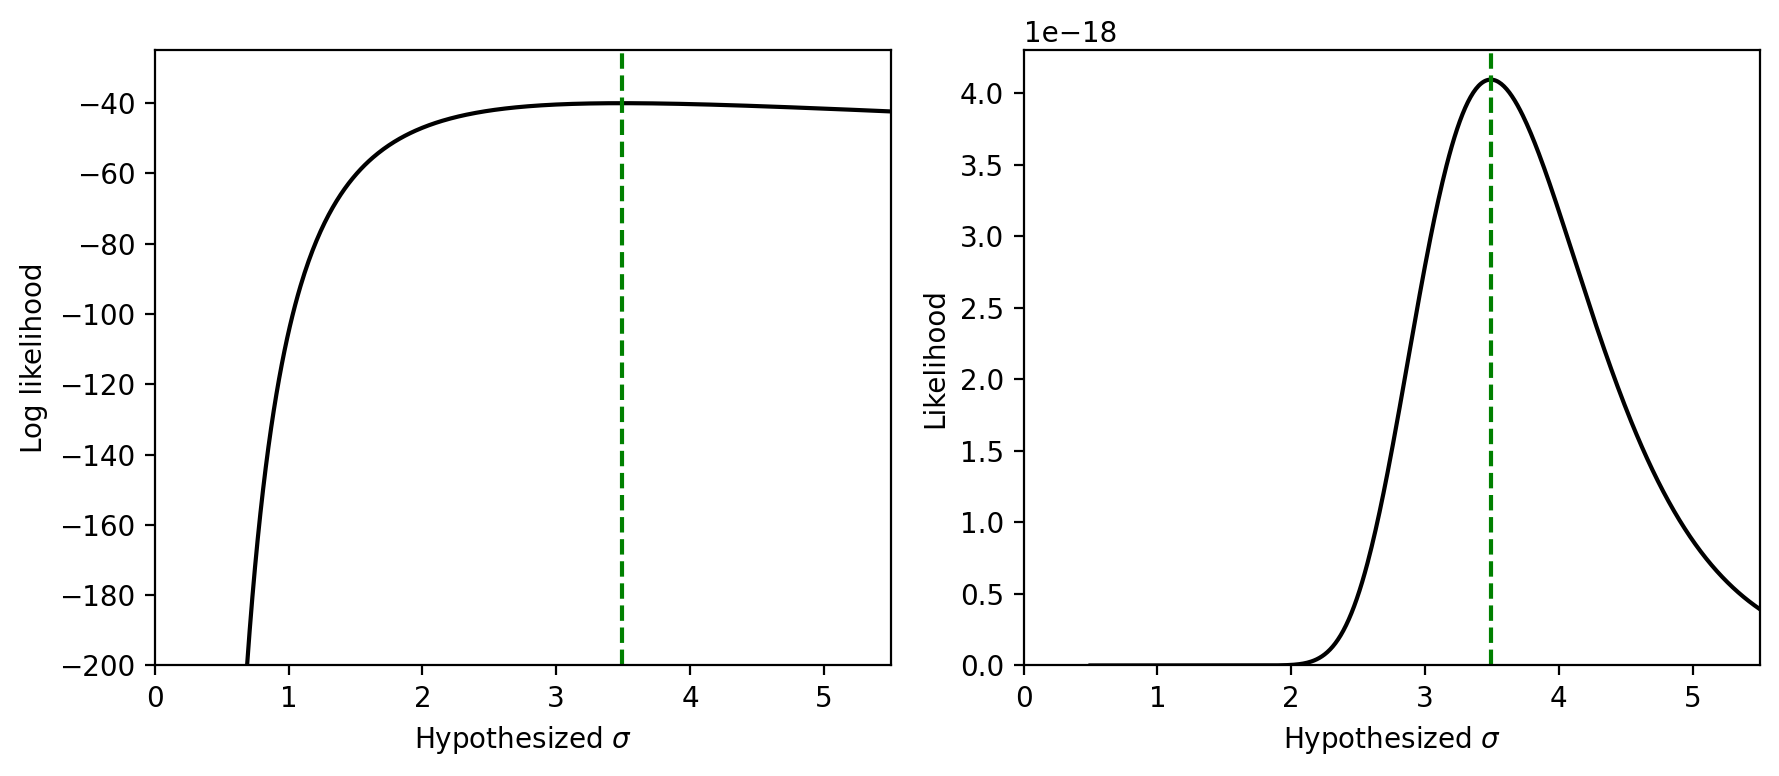

In [6]:
# Recreating Fig. C.3 (A, B)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
ax1.plot(sigmas, log_likelihood, color="k")
ax1.axvline(sigma_mle, linestyle="--", color="g")
ax1.set(xlim=[0, 5.5], ylim=[-200, -25], xlabel="Hypothesized $\sigma$", 
        ylabel="Log likelihood")
ax2.plot(sigmas, np.exp(log_likelihood), color="k")
ax2.axvline(sigma_mle, linestyle="--", color="g")
ax2.set(xlim=[0, 5.5], xlabel="Hypothesized $\sigma$", 
        ylabel="Likelihood")
ax2.set_ylim(bottom=0)
plt.tight_layout()

## Takeaways regarding grid search

- Grid search is how you will fit parameters for most (all?) of the models for the remainder of the semester
- Likelihood is not Gaussian - this is in part because $\sigma$ can only be positive-valued
- Log-likelihood takes values that are in negative hundreds or thousands because each prob from pmf, and often pdf, is less than 1 (resulting in negative-valued log-likelihood - convince yourself of this!)

### Advantages:
1) Transparency - you know exactly what you're doing
2) Visualization - you can plot everything and perform sanity checks

### Disadvantages:
1) Resolution - only as fine as you're willing to make it
2) Unwieldy - in case of large numbers of parameters, it becomes time-consuming to compute (1000 values for 4 parameters results in $10^{12}$ parameter combinations) 

If grid search is impractical, consider whether your model is too complex (see Model Selection)! (This comment is only in reference to computational models, not statistical models.)


### Model checking

- Just because you *can* fit a model to your data doesn't mean the model is any good
- A common sense way to check the quality of your model (also the easiest, and sometimes sufficient way) is to plot the data along with the corresponding representation of the fitted model. 
- That is, simulate and see if the pattern of simulated data look anything like the empirical data! 

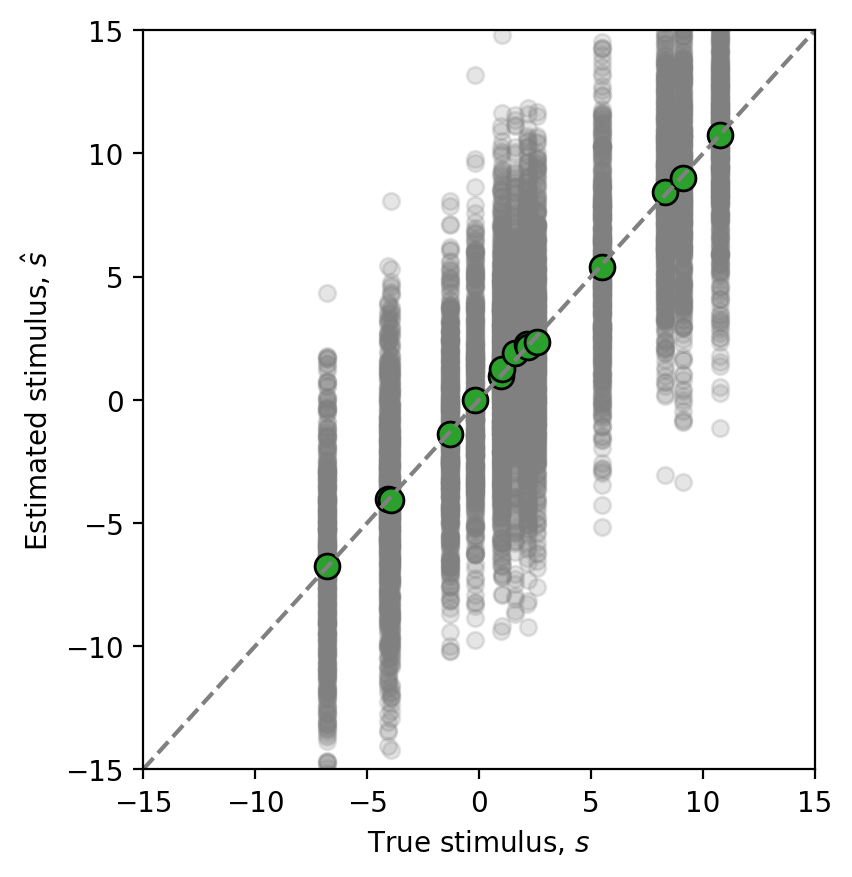

In [7]:
# Check for model fit: Simulate 500 trials at each stimulus level
n_trials = 500
stim_est = np.zeros((n_trials, len(s)))
s_sorted = np.sort(s)
for i in range(len(s_sorted)):
    stim_est[:, i] = np.random.normal(loc=s_sorted[i], scale=sigma_mle, size=n_trials)

# Plot figure
lb, ub = [-15, 15]  # Axes boundaries
fig, ax = plt.subplots()
ax.plot([lb, ub], [lb, ub], linestyle="--", color=[0.5, 0.5, 0.5])
ax.scatter(
    x=np.repeat(s_sorted, n_trials),
    y=stim_est.T.flatten(), 
    color=[0.5, 0.5, 0.5],
    alpha=0.2
)
ax.scatter(s_sorted, np.mean(stim_est, axis=0), color="tab:green", s=80,
          edgecolor="k")
ax.set(xlim=[lb, ub], ylim=[lb, ub], xlabel="True stimulus, $s$", 
       ylabel="Estimated stimulus, $\hat{s}$")
ax.set_box_aspect(1.1)
plt.show()

## Think!

Based on the simulation above, is this a good model? 

---
## C.5.2 A Better Model

Observer uses a prior centered on zero and with SD of $\sigma_s$. Here, we fit a model with 2 free parameters: $\sigma$ and $\sigma_s$.

In [8]:
# Ideal observer model
sigma_priors = np.linspace(0.02, 10, 100)
sigma_likelihoods = np.linspace(0.02, 10, 100)
ll_mat = np.zeros((len(sigma_priors), len(sigma_likelihoods)))  # Initialize array

# Loop through possible sigmas
for i in range(len(sigma_priors)):
    for j in range(len(sigma_likelihoods)):
        mu_post = (s / sigma_likelihoods[j]**2) / \
               ((1 / sigma_likelihoods[j]**2) + (1 / sigma_priors[i]**2))
        var_post = (1 / sigma_likelihoods[j]**2) \
               / ((1 / sigma_likelihoods[j]**2) + (1 / sigma_priors[i]**2))**2
        ll_mat[i, j] = np.sum((-1 / 2) * np.log(2 * np.pi * var_post) \
                              - ((s_hat - mu_post)**2 / (2 * var_post)))
        # Set lowest values so contrasts show up on heatmap (see fig caption)
        if ll_mat[i, j] < -300:
            ll_mat[i, j] = -300
        

In [9]:
# Find the row and col indices of the MLEs for both sigmas
idx_row, idx_col = np.unravel_index(np.argmax(ll_mat, axis=None), ll_mat.shape)

# Check answer against textbook (numbers are off by tiny margin for some reason)
print(f"The MLE of the likelihood SD is {sigma_likelihoods[idx_col]:0.2f}, \
and for the prior SD it is {sigma_priors[idx_row]:.2f}.")

# Check to see if max log-likelihood is the same (it is)
print(f"The maximum value of the log-likelihood is {np.max(ll_mat):.1f}.")

# Assign these values to new variables for next simulation (Bayesian model)
sigma_likelihood_bayes = sigma_likelihoods[idx_col]
sigma_prior_bayes = sigma_priors[idx_row]


The MLE of the likelihood SD is 1.73, and for the prior SD it is 1.23.
The maximum value of the log-likelihood is -13.2.


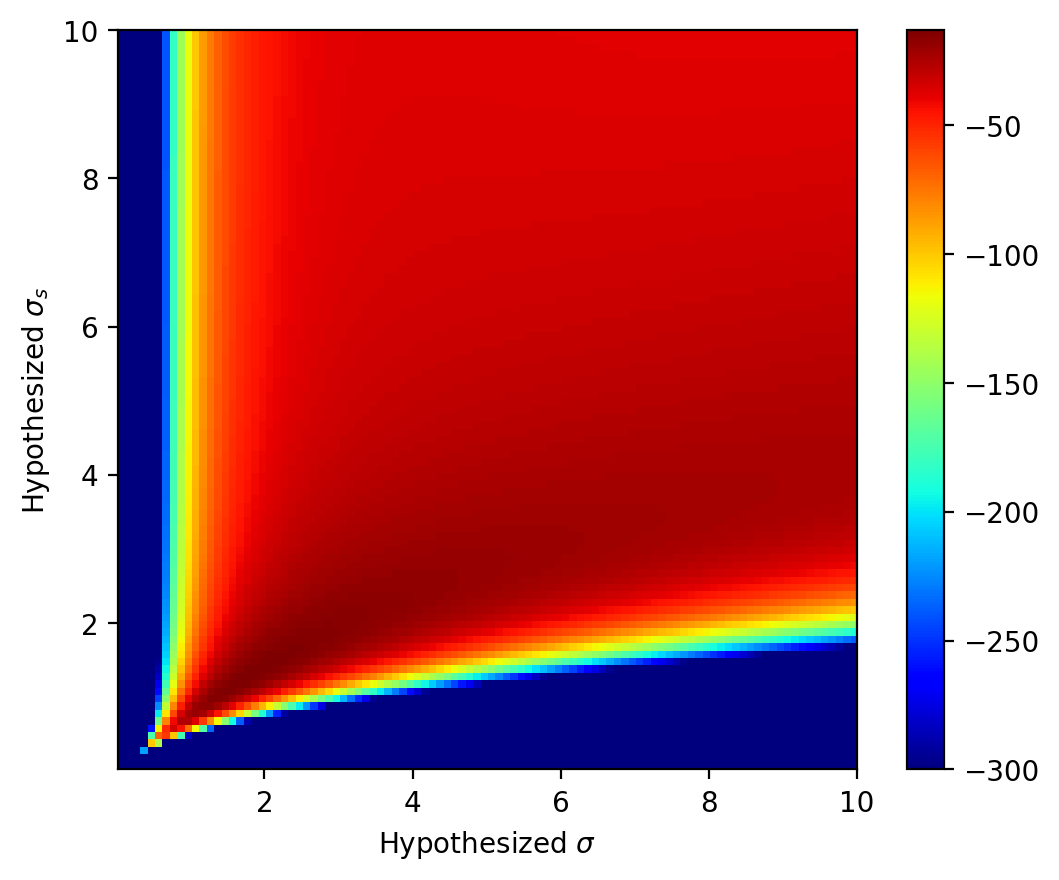

In [10]:
# Plot heat map of the log-likelihoods - first several lines are to use correct
# values on axes
left = sigma_likelihoods.min()
right = sigma_likelihoods.max()
bottom = sigma_priors.min()
top = sigma_priors.max()
extent = [left, right, bottom, top]
plt.imshow(ll_mat, origin="lower", cmap="jet", extent=extent)
plt.xlabel("Hypothesized $\sigma$")
plt.ylabel("Hypothesized $\sigma_s$")
plt.colorbar()
plt.show()


---
### Now simulate the Bayesian ideal observer

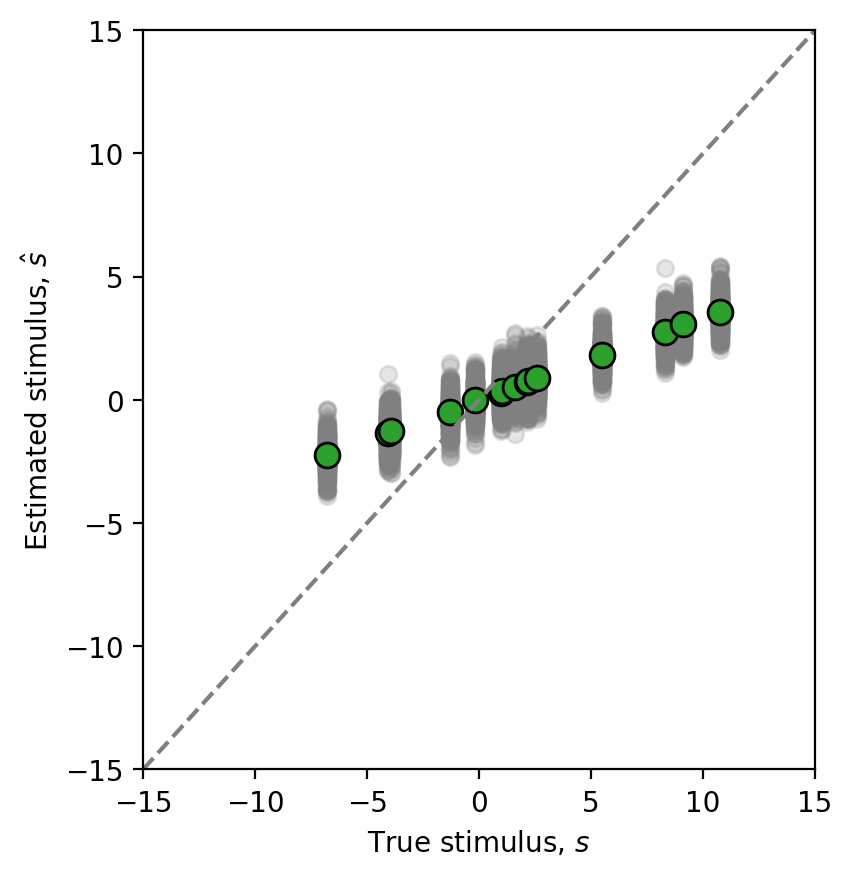

In [11]:
# Check for model fit: Simulate 500 trials at each stimulus level
mu_prior = 0
sigma_post = np.sqrt((1 / sigma_likelihood_bayes**2)
                     / (1 / sigma_likelihood_bayes**2 + 1 / sigma_prior_bayes**2)**2) 
n_trials = 500
stim_est = np.zeros((n_trials, len(s)))
s_sorted = np.sort(s)

# Simulate trials
for i in range(len(s_sorted)):
    stim_est[:, i] = np.random.normal(
        loc=(s_sorted[i] / sigma_likelihood_bayes**2 + mu_prior / sigma_prior_bayes**2) 
        / (1 / sigma_likelihood_bayes**2 + 1 / sigma_prior_bayes**2), 
        scale=sigma_post, 
        size=n_trials)

# Plot figure
lb, ub = [-15, 15]  # Axes boundaries
fig, ax = plt.subplots()
ax.plot([lb, ub], [lb, ub], linestyle="--", color=[0.5, 0.5, 0.5])
ax.scatter(
    x=np.repeat(s_sorted, n_trials),
    y=stim_est.T.flatten(), 
    color=[0.5, 0.5, 0.5],
    alpha=0.2
)
ax.scatter(s_sorted, np.mean(stim_est, axis=0), color="tab:green", s=80,
          edgecolor="k")
ax.set(xlim=[lb, ub], ylim=[lb, ub], xlabel="True stimulus, $s$", 
       ylabel="Estimated stimulus, $\hat{s}$")
ax.set_box_aspect(1.1)
plt.show()

---
## Model Comparison (Selection)

- How do we know which model fits the data best? That is, how can we use the $\mathscr{L}^*$ (maximum log-likelihood) of different models to objectively compare them? 
- The issue is that you have to consider both how well a model fits your data *and* how complex it is? An overly complex model may fit your data great, but that doesn't mean it can make accurate predictions.
- Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) are two of the most popular metrics of model quality&mdash;both take into account the fit ($\mathscr{L}^*$) and complexity (the number of free parameters)

\begin{align}
\text{AIC} &= -2(\log\mathscr{L}^* - n_{\text{parameters}}) \\
\text{BIC} &= -2\left(\log\mathscr{L}^* - \dfrac{\log n_{\text{trials}}}{2} n_{\text{parameters}}\right) \
\end{align}

- The model with the lowest AIC or BIC value is considered the best


### Cross-validation

- Conceptually different: Here we are concerned with the accuracy (or, log-likelihood) of model when tested on "out-of-sample" (test) data
- Bread and butter method within Machine Learning
- Divide data into *K* folds that are statistically equivalent (no systematic differences between data in each fold)
- Figure below illustrates 5-fold CV

<center><img src="images/cross-validation.png" width=800></center>

## Parameter Recovery and Model Recovery

- Simulate data with your models
- Then, fit your simulated with your models
- The model that generated the data should be able to fit the data well!
    - More specifically, the MLE of the parameters should be very close to the ones used to create the fake data
- Formal model comparison should show that the model which generated the fake data is also the best model 
- The Wilson & Collins (2019) paper is a great overview of these steps that goes into greater detail!